# Tutorial 1 : Espectro de Ondas de Spin da Cadeia de Spins Ferromagnética de Heisenberg mais Próxima

Embora estejamos a modelar um sistema tridimensional, ao adicionar ligações entre átomos, estamos a considerar apenas ligações unidimensionais ao longo da cadeia. Isso significa que simplificamos o sistema para uma representação unidimensional, o que tem várias consequências:

- Perda de informação: Ao restringir as ligações a uma única dimensão, estamos a simplificar significativamente o modelo, tornando-o mais fácil de entender e analisar. No entanto, isso também significa que estamos perdendo algumas informações sobre as interações tridimensionais entre os átomos.
- Anisotropia Magnética: A simplificação para uma dimensão pode levar a uma descrição anisotrópica do comportamento magnético. Isso significa que as propriedades magnéticas ao longo da cadeia podem ser diferentes das observadas em direções perpendiculares.
- Limitações na Representação de Propriedades Tridimensionais: Ao considerar apenas ligações unidimensionais, podemos não capturar totalmente as propriedades tridimensionais reais do material. Portanto, devemos interpretar os resultados com cautela e estar cientes das limitações do modelo.


### Define-se a cadeia de spins com átomos magnéticos

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 2k vertices are drawn!



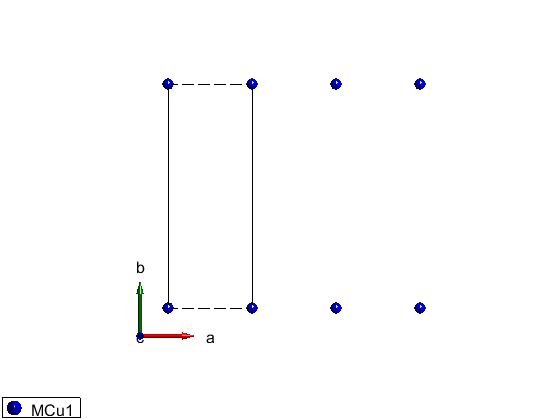

In [99]:
FMchain = spinw; % Cria um objeto SpinW
FMchain.genlattice('lat_const',[3 8 8],'angled',[90 90 90]); % Gera a rede cristalina
FMchain.addatom('r', [0 0 0],'S', 1,'label','MCu1','color','blue'); % Adiciona átomos magnéticos
FMchain.plot('range',[3 1 1]); % Plota a estrutura cristalina


- Explicação: Aqui, estamos a criar uma instância do objeto SpinW, que será usado para representar a cadeia de spins. Em seguida, definimos os parâmetros da rede cristalina, incluindo os comprimentos dos vetores de rede e os ângulos entre eles, com uso da função genlattice(), o menor parâmetro de rede ao longo do eixo 'a' determinará as ligações de primeiros vizinhos ao longo desse eixo. Adicionamos um átomo magnético de cobre (Cu+) na posição (0, 0, 0) da célula unitária, atribuimos um spin de 1 à esse átomo. Por fim, plotamos a estrutura cristalina gerada para visualização.
- Mudanças Possíveis: Pode-se alterar os parâmetros da rede cristalina, como os comprimentos dos vetores de rede e os ângulos entre eles, para representar diferentes estruturas cristalinas. Isso pode afetar a geometria e a conectividade dos átomos magnéticos na cadeia de spins.
- Mas, porque?: Como estamos interessados no espectro de ondas de spin em uma cadeia de spins ferromagnética de Heisenberg mais próxima, começamos definindo a estrutura da cadeia de spins e adicionando átomos magnéticos para representar os spins na cadeia. A escolha dos parâmetros da rede cristalina, como os comprimentos dos vetores de rede, é crucial para garantir que a estrutura da cadeia de spins seja modelada com precisão.

### Determina-se a Lista de Ligações com Base no Comprimento

In [103]:
FMchain.gencoupling('maxDistance',7); % Gera as ligações entre spins
FMchain.table('bond',1:2); % Lista as ligações de primeira e segunda vizinhança

Creating the bond list (maxDistance = 7 Å, nCell = 3x1x1)...
...2 bonds are retained out of 36 generated!



- Explicação: Aqui, estamos a determinar as ligações entre os spins na cadeia de spins, considerando uma distância máxima de 7 Angstrom entre os spins. A função gencoupling() gera as ligações entre os spins, e a função table() lista as ligações de primeira e segunda vizinhança na forma de uma tabela.Como nenhum operador de simetria está definido, ele ordena todas as ligações de acordo com o aumento do comprimento, todas as ligações equivalentes que têm o mesmo comprimento dentro de uma margem de erro (0,001 angstrom por padrão).

- Mudanças Possíveis: Alterar o valor de maxDistance influenciará quais ligações serão consideradas na cadeia de spins. Aumentar esse valor vai resultar em mais ligações sendo consideradas, enquanto diminuir o valor resultará em menos ligações.

- Mas, porque?: Como estamos a modelar uma cadeia de spins mais próxima, precisamos determinar as ligações entre os spins na cadeia. 




### Define-se o Hamiltoniano de spins

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!



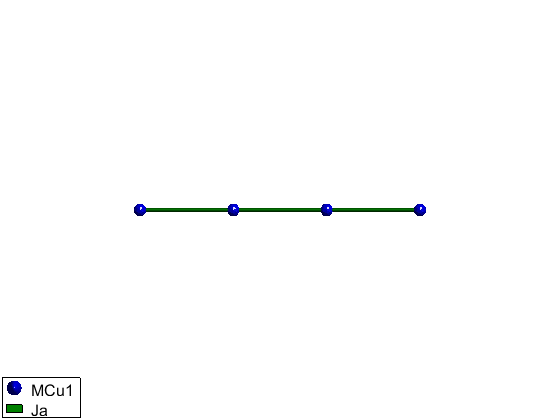

In [107]:
FMchain.addmatrix('value',-eye(3),'label','Ja','color','green'); % Define a matriz de interação ferromagnética de Heisenberg
FMchain.addcoupling('mat','Ja','bond',1); % Atribui a interação ferromagnética às ligações
plot(FMchain,'range',[3 0.2 0.2],'cellMode','none','baseMode','none'); % Plota a estrutura cristalina com as ligações adicionadas

- Explicação: Aqui, definimos o Hamiltoniano de spins para descrever a interação ferromagnética entre os spins na cadeia de spins. Criamos uma matriz de nome 'Ja' para representar a interação ferromagnética de Heisenberg, J = -1 meV e a atribuímos às às primeiras ligações vizinhas como interação de troca spin-spin: J*S(i)*S(i+1) com uso da função addcoupling(). Em seguida, plotamos a estrutura cristalina com as ligações adicionadas para visualização.

- Mudanças Possíveis: Alterar a matriz de interação Ja modificará a força e o tipo de interação entre os spins na cadeia. Isso pode afetar as propriedades magnéticas da cadeia de spins.

- Mas, porque?: Definimos explicitamente a matriz de interação ferromagnética de Heisenberg para poder descrever as interações entre spins na cadeia.



### Definição da Estrutura Magnética FM

> In spinw/genmagstr (line 280)
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!



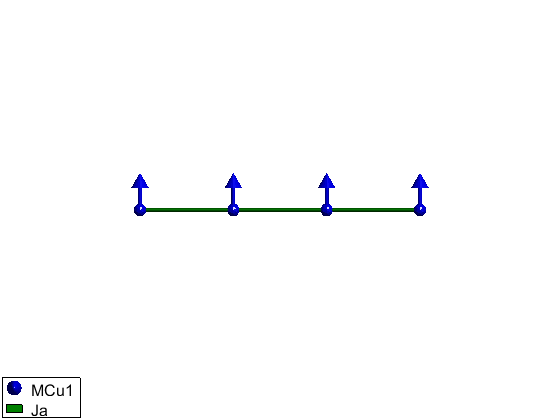

In [111]:
FMchain.genmagstr('mode','direct', 'k',[0 0 0],'n',[1 0 0],'S',[0; 1; 0]); % Define a estrutura magnética ferromagnética
FMchain.table('mag'); % Lista a estrutura magnética
plot(FMchain,'range',[3 0.9 0.9],'baseMode','none','cellMode','none'); % Plota a estrutura magnética



- Explicação: Aqui, definimos a estrutura magnética ferromagnética da cadeia de spins. Especificamos a configuração dos spins na cadeia, incluindo o vetor de onda magnética, a orientação dos spins e o vetor de spin. O estado magnético clássico de menor energia do Hamiltoniano previamente definido é aquele em que todos os spins têm a mesma direção. A direção é arbitrária, uma vez que o Hamiltoniano é isotrópico. Usamos os seguintes parâmetros:

  - Vetor de onda de ordenação magnética k = (0 0 0)
  - Existe um único spin por célula unitária S = [0 1 0]
  - Um vetor normal arbitrário ao spin   n = [1 0 0]
  
  Em seguida, listamos e plotamos a estrutura magnética para visualização.


- Mudanças Possíveis: Alterar o vetor de onda magnética k ou a orientação do vetor de spin S resultará em diferentes configurações magnéticas para a cadeia de spins. Isso pode afetar as propriedades magnéticas da cadeia, como a direção da magnetização e a presença de domínios magnéticos.


- Mas, porque: A cadeia de spins ferromagnética de Heisenberg mais próxima possui uma estrutura magnética específica. Aqui, definimos essa estrutura magnética.


### Energia do estado fundamental por spin

In [115]:
FMchain.energy; % Calcula a energia do estado fundamental por spin
assert(FMchain.energy == -1)

Ground state energy: -1.000 meV/spin.



Explicação: Este comando calcula a energia do estado fundamental por spin usando o SpinW. Essa energia representa a estabilidade do estado fundamental da cadeia de spins ferromagnética.

### Calcula o espectro de ondas de spin e a função de correlação spin-spin

Calculating COMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 100, nTwin = 1)...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



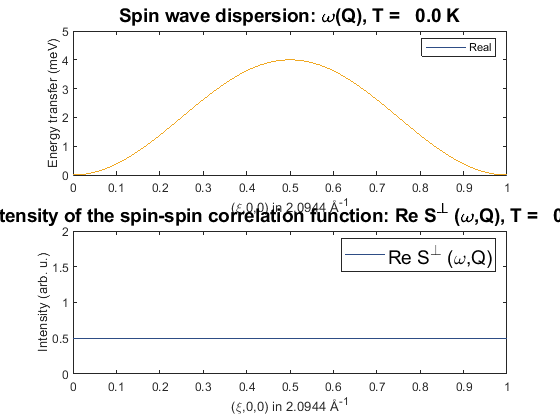

In [121]:
FMspec = FMchain.spinwave({[0 0 0] [1 0 0]},'hermit',false); % Calcula o espectro de ondas de spin
FMspec = sw_neutron(FMspec); % Calcula a função de correlação spin-spin
FMspec = sw_egrid(FMspec,'component','Sperp'); % Seleciona a intensidade da dispersão de nêutrons
% plot
figure;
subplot(2,1,1)
sw_plotspec(FMspec,'mode',1,'colorbar',false)
axis([0 1 0 5])
subplot(2,1,2)
sw_plotspec(FMspec,'mode',2)
axis([0 1 0 2])
swplot.subfigure(1,3,1)

- Explicação: Aqui, calculamos o espectro de ondas de spin e a função de correlação spin-spin para a cadeia de spins ferromagnética.O valor da transferência de momento é Q = (H 0 0). Em seguida, calculamos a seção de choque de espalhamento de neutrões e selecionamos 'Sperp', a intensidade de espalhamento de neutrões, para plotagem. Então, plotamos a dispersão das ondas de spin e o valor da função de correlação com a seção de choque de espalhamento de neutrões 1-Q^2. O espectro de ondas de spin mostra como as ondas de spin se propagam na cadeia, enquanto a função de correlação spin-spin indica como os spins interagem entre si.
- Mudanças Possíveis: Alterar os vetores de onda usados para calcular o espectro de ondas de spin resultará em diferentes padrões de dispersão de spin. Isso é útil para investigar como diferentes modos de spin se propagam na cadeia de spins. Alterar outros parâmetros, como a resolução ou o número de pontos aleatórios, afetará a precisão e a qualidade dos resultados calculados.


### Calcula o espectro médio do pó


Calculating powder spectra...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
  1.00%, remained: 000:00:13 (HH:MM:SS).
  2.00%, remained: 000:00:11 (HH:MM:SS).
  3.00%, remained: 000:00:12 (HH:MM:SS).
  4.00%, remained: 000:00:12 (HH:MM:SS).
  5.00%, remained: 000:00:11 (HH:MM:SS).
  6.00%, remained: 000:00:12 (HH:MM:SS).
  7.00%, remained: 000:00:11 (HH:MM:SS).
  8.00%, remained: 000:00:11 (HH:MM:SS).
  9.00%, remained: 000:00:11 (HH:MM:SS).
 10.00%, remained: 000:00:11 (HH:MM:SS).
 11.00%, remained: 000:00:11 (HH:MM:SS).
 12.00%, remained: 000:00:11 (HH:MM:SS).
 13.00%, remained: 000:00:11 (HH:MM:SS).
 14.00%, remained: 000:00:11 (HH:MM:SS).
 15.00%, remained: 000:00:10 (HH:MM:SS).
 16.00%, remained: 000:00:10 (HH:MM:SS).
 17.00%, remained: 000:00:10 (HH:MM:SS).
 18.00%, remained: 000:00:10 (HH:MM:SS).
 19.00%, remained: 000:00:10 (HH:MM:SS).

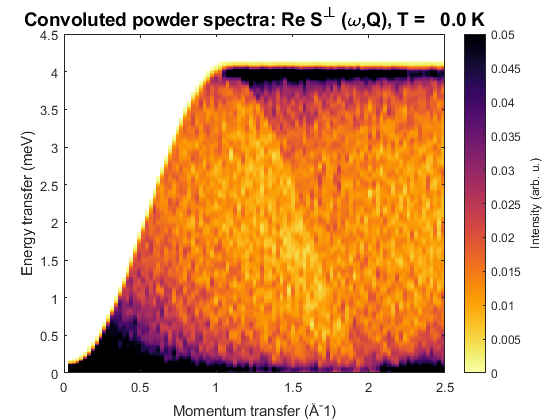

In [131]:
% Calcula o espectro de potência para a cadeia de spins ferromagnéticos usando a função powspec() do objeto FMchain.
% A opção 'hermit' é definida como false,
% indicando que os cálculos não são realizados no espaço recíproco.
FMpowspec = FMchain.powspec(linspace(0, 2.5, 100), 'Evect', linspace(0, 4.5, 250), 'nRand', 1000, 'hermit', false);

% Cria uma nova figura.
figure;

% Plota o espectro de potência usando a função sw_plotspec().
sw_plotspec(FMpowspec, 'dE', 0.1)

% Define os limites dos eixos.
axis([0 2.5 0 4.5]);

% Define a faixa de cores para o gráfico.
caxis([0 .05]);


- Explicação:Nesta etapa, calculamos o espectro de pó para valores de transferência de momento 𝑄 variando de 0 a 2.5 Angstrom^−1, com uma resolução de 100 passos. Para cada passo, selecionamos aleatoriamente 1000 pontos 𝑄.
Em seguida, plotamos o espectro resultante, convoluído com uma gaussiana de 0.1 meV ao longo da energia.


- Mudanças Possíveis: Alterar os parâmetros de entrada, como os valores do vetor de onda ou o número de pontos aleatórios considerados, resultará em mudanças na resolução e na amplitude do espectro médio do pó.